In [1]:
##################################################
############# Change these variables #############
##################################################
league = "K League 1"
team = "Jeonbuk Motors"
var = 'xG'
var2 = 'xGA'
var1_color = 'teal'
var2_color = '#DE89BE'
signature = '@BeGriffis'
period = 10    # 4, 6, or 10
ref = '0'      # '0'   or   'med'
ma_type = ''
img_path = 'YOUR/PATH/HERE/'
##################################################
##################################################
##################################################

# set the path where your Wyscout team stats excels are located
path = "YOUR/PATH/HERE"


(-0.5, 422.5, 515.5, -0.5)

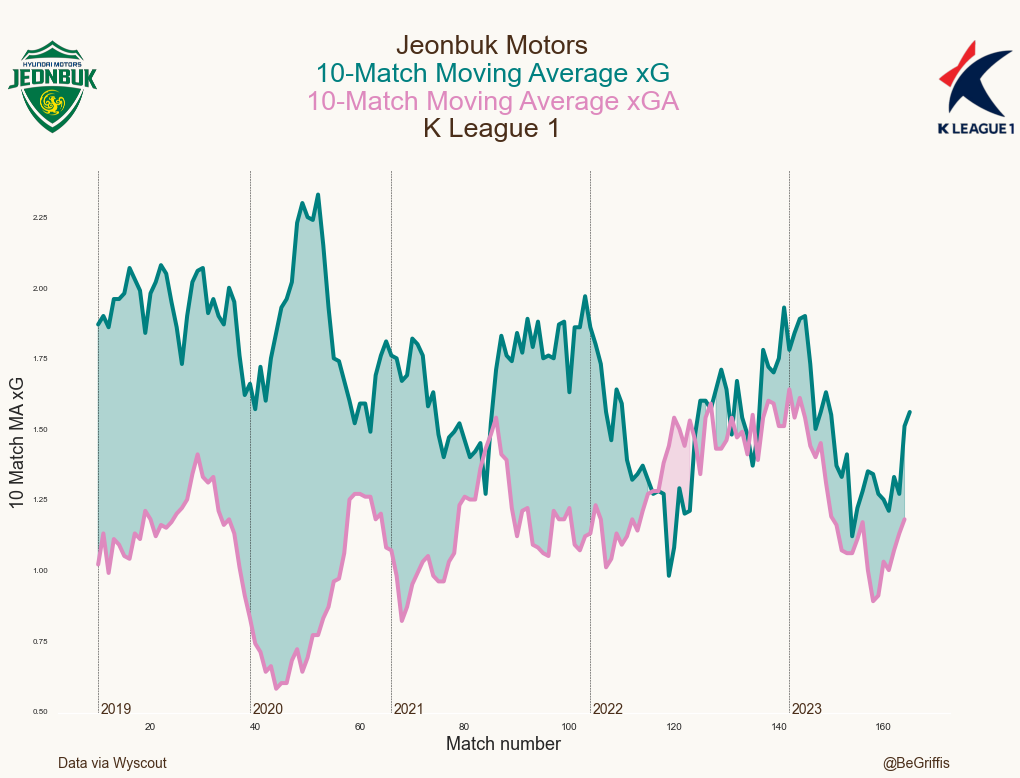

In [2]:
#### import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import os
from highlight_text import fig_text
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

### set up basic graph formatting
sns.set(rc={'figure.dpi': 200,
            'axes.grid': False,
            'text.color': '#4A2E19',
            'axes.facecolor': '#fbf9f4',
            'figure.facecolor':'#fbf9f4',
            'figure.figsize':(6,7),
            'axes.labelsize': 18,
            'ytick.labelsize': 8,
            'xtick.labelsize': 10,
           })

### import data. Iterate through all xlsx in the 'path' variable locatio and add to one dataframe
df = pd.DataFrame()
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        new = pd.read_excel(os.path.join(path, file))[::-1]
        
        # this makes the 'Season' variable the Excel file name.
        # name the files 2021, 2022... or 21-22, 22-23...
        new['Season'] = ''
        new['Season'] = file[:-5]
        new = new.reset_index(drop=True).reset_index(drop=False)
        new.rename(columns={'index':'Match Number'},inplace=True)
        
        # get the match number within a season. Wyscout has 2 entries (focal team & opponent) hence the /2
        new['Match Number'] = (new['Match Number'] + 1)/2
        df = pd.concat([df , new], axis=0)

df.reset_index(drop=True, inplace=True)
df.dropna(subset=['Match'],inplace=True)
df.reset_index(drop=True,inplace=True)

# this is the file path root, i.e. where this file is located
root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'


############# Just formatting the data. Many wasy to do this, this is a non-clean and basic way lol #############
df.columns = ['Match Number','Date', 'Match', 'Competition', 'Minutes', 'Team', 'Scheme', 'Goals', 'xG', 'Shots', 'Shots on target',
                               'Shots on target %', 'Passes', 'Accurate passes', 'Pass completion %', 'Possession %', 'Ball losses',
                               'Ball losses defensive third', 'Ball losses middle third', 'Ball losses final third', 'Recoveries',
                               'Recoveries defensive third', 'Recoveries middle third', 'Recoveries final third', 'Duels', 'Duels won',
                               'Duel win %', 'Shots outside box', 'Shots outside box on target', 'Shots outside box on target %',
                               'Positional attacks', 'Positional attacks with shots', 'Positional attacks with shots %', 'Counter attacks',
                               'Counter attacks with shots', 'Counter attacks with shots %', 'Set pieces', 'Set pieces with shots',
                               'Set pieces with shots %', 'Corners', 'Corners with shots', 'Corners with shots %', 'Free kicks',
                               'Free kicks with shots', 'Free kicks with shots %', 'Penalties', 'Penalties scored', 'Penalty conversion %',
                               'Crosses', 'Accurate crosses', 'Cross completion %', 'Deep completed crosses', 'Deep completed passes', 
                               'Penalty area entries', 'Penalty area entries via carries', 'Penalty area entries via crosses',
                               'Touches in penalty area', 'Offensive duels', 'Offensive duels won', 'Offensive duel win %', 'Offsides',
                               'Conceded goals', 'Shots faced', 'Shots on target faced', 'Shots faced on target %', 'Defensive duels',
                               'Defensive duels won', 'Defensive duel win %', 'Aerial duels', 'Aerial duels won', 'Aerial duel win %',
                               'Slide tackles', 'Slide tackles won', 'Slide tackle win %', 'Interceptions', 'Clearances', 'Fouls', 'Yellow cards',
                               'Red cards', 'Forward passes', 'Accurate forward passes', 'Forward pass completion %', 'Back passes',
                               'Accurate back passes', 'Back pass completion %', 'Lateral passes', 'Accurate lateral passes',
                               'Lateral pass completion %', 'Long passes', 'Accurate long passes', 'Long pass completion %', 'Passes to final third',
                               'Accurate passes to final third', 'Passes to final third completion %', 'Progressive passes', 'Accurate progressive passes',
                               'Progressive pass completion %', 'Smart passes', 'Accurate smart passes', 'Smart pass completion %', 'Throw ins',
                               'Accurate throw ins', 'Throw in completion %', 'Goal kicks', 'Match tempo', 'Average passes per possession',
                               '% of passes long', 'Average shot distance', 'Average pass length', 'PPDA', 'Season',]

df['Opponent'] = df['Team'].shift(-1)
df['PPDA faced'] = df['PPDA'].shift(-1)
df['Average opponent passes per possession allowed'] = df['Average passes per possession'].shift(-1)
df['Average opponent shot distance'] = df['Average shot distance'].shift(-1)
df['Positional attacks faced'] = df['Positional attacks'].shift(-1)
df['Positional attacks with shots % faced'] = df['Positional attacks with shots %'].shift(-1)
df['Counter attacks faced'] = df['Counter attacks'].shift(-1)
df['Counter attacks with shots % faced'] = df['Counter attacks with shots %'].shift(-1)
df['xGA'] = df['xG'].shift(-1)
df['xGD'] = df['xG'] - df['xGA']
df['Shots outside box faced'] = df['Shots outside box'].shift(-1)
df['Shots outside box faced on target %'] = df['Shots outside box on target %'].shift(-1)
df['Crosses faced'] = df['Crosses'].shift(-1)
df['Cross completion % faced'] = df['Cross completion %'].shift(-1)
df['npxG'] = df['xG'] - (0.76*df['Penalties'])
df['npxG faced'] = df['xGA'] - (0.76*(df['Penalties'].shift(-1)))
df['npxG per shot'] = df['npxG'] / (df['Shots'] - df['Penalties'])
df['npxG per shot faced'] = df['npxG faced'] / (df['Shots faced'] - (df['Penalties'].shift(-1)))
df['Goal difference'] = df['Goals']-df['Conceded goals']
df['GD-xGD'] = df['Goal difference'] - df['xGD']
df['Opponent average passes per possession'] = df['Average passes per possession'].shift(-1)
df['Result'] = ''
df['Points'] = 0
for i in range(len(df)):
    if df['Goal difference'][i] > 0:
        df['Result'][i] = 'W'
        df['Points'][i] = 3
    if df['Goal difference'][i] == 0:
        df['Result'][i] = 'D'
        df['Points'][i] = 1
    if df['Goal difference'][i] < 0:
        df['Result'][i] = 'L'
        df['Points'][i] = 0
df['Positional attacks as % of all attacks'] = df['Positional attacks']/(df['Positional attacks'] + df['Counter attacks'])
df['Counter attacks %'] = df['Counter attacks']/(df['Positional attacks'] + df['Counter attacks'])
df['Penalty area entries pAdj'] = (df['Penalty area entries']/df['Possession %'])*50
df['Crosses pAdj'] = (df['Crosses']/df['Possession %'])*50
df['Passes to final third pAdj'] = (df['Passes to final third']/df['Possession %'])*50
df['Progressive passes pAdj'] = (df['Progressive passes']/df['Possession %'])*50
df['Smart passes pAdj'] = (df['Smart passes']/df['Possession %'])*50
df['Deep completed crosses pAdj'] = (df['Deep completed crosses']/df['Possession %'])*50
df['Deep completed passes pAdj'] = (df['Deep completed passes']/df['Possession %'])*50
df['Interceptions pAdj'] = (df['Interceptions']/(100-df['Possession %']))*50
df['Back passes forced %'] = ((((df['Back passes'].shift(-1))/(df['Passes'].shift(-1)))))
df['Crossing Rate'] = df['Crosses']/df['Passes']*100
df['% of box entries by passs'] = (df['Penalty area entries'] - df['Penalty area entries via carries'] - df['Penalty area entries via crosses'])/df['Penalty area entries']*100
df = df[df['Team']==team].reset_index(drop=True)

### add match numbers to the matches so we can see total number of matches in the dataset
df = df.reset_index()
df.rename(columns={'index':'Match number'},inplace=True)
df['Match number'] = df['Match number']+1


###################################################
############ CALCULATE MOVING AVERAGES ############
###################################################

df['%i Match MA %s' %(period,var)] = float(0.0)
arr = df[var].values

if var2 != '':
    df['%i Match MA %s' %(period,var2)] = float(0.0)
    arr2 = df[var2].values

i = 0
# Initialize an empty list to store moving averages
moving_averages = []

while i < len(arr):
    # Calculate the average of current window
    if ma_type == 'Weighted ':
        period_weighted = round((.4*arr[i]) + (.3*arr[(i-1)]) + (.2*arr[(i-2)]) + (.1*arr[(i-3)]), 2)
    if ma_type == '':
        if period == 4:
            period_average = round((.25*arr[i]) + (.25*arr[(i-1)]) + (.25*arr[(i-2)]) + (.25*arr[(i-3)]), 2)
        if period == 6:
            period_average = round((.1666*arr[i]) + (.1666*arr[(i-1)]) + (.216665*arr[(i-2)]) + (.1666*arr[(i-3)]) + (.1666*arr[(i-4)]) + (.1666*arr[(i-5)]), 2)
        if period == 10:
            period_average = round((.1*arr[i]) + (.1*arr[(i-1)]) + (.1*arr[(i-2)]) + (.1*arr[(i-3)]) + (.1*arr[(i-4)]) + (.1*arr[(i-5)]) + (.1*arr[(i-6)]) + (.1*arr[(i-7)]) + (.1*arr[(i-8)]) + (.1*arr[(i-9)]), 2)

    # Store the average of current
    # window in moving average list
    if ma_type == '':
        moving_averages.append(period_average)
    if ma_type == 'Weighted ':
        moving_averages.append(period_weighted)
      
    # Shift window to right by one position
    i += 1

for j in range(len(moving_averages)):
    df['%i Match MA %s' %(period,var)].iloc[j] = moving_averages[j]
for q in range(0,(period-1)):
    df['%i Match MA %s' %(period,var)].iloc[q] = np.nan

##### Variable 2 Moving Average
if var2 != '':
    i = 0
    # Initialize an empty list to store moving averages
    moving_averages = []

    while i < len(arr2):
        # Calculate the average of current window
        if ma_type == 'Weighted ':
            period_weighted = round((.4*arr2[i]) + (.3*arr2[(i-1)]) + (.2*arr2[(i-2)]) + (.1*arr2[(i-3)]), 2)
        if ma_type == '':
            if period == 4:
                period_average = round((.25*arr2[i]) + (.25*arr2[(i-1)]) + (.25*arr2[(i-2)]) + (.25*arr2[(i-3)]), 2)
            if period == 6:
                period_average = round((.1666*arr2[i]) + (.1666*arr2[(i-1)]) + (.216665*arr2[(i-2)]) + (.1666*arr2[(i-3)]) + (.1666*arr2[(i-4)]) + (.1666*arr2[(i-5)]), 2)
            if period == 10:
                period_average = round((.1*arr2[i]) + (.1*arr2[(i-1)]) + (.1*arr2[(i-2)]) + (.1*arr2[(i-3)]) + (.1*arr2[(i-4)]) + (.1*arr2[(i-5)]) + (.1*arr2[(i-6)]) + (.1*arr2[(i-7)]) + (.1*arr2[(i-8)]) + (.1*arr2[(i-9)]), 2)

        # Store the average of current
        # window in moving average list
        if ma_type == '':
            moving_averages.append(period_average)
        if ma_type == 'Weighted ':
            moving_averages.append(period_weighted)

        # Shift window to right by one position
        i += 1

    for j in range(len(moving_averages)):
        df['%i Match MA %s' %(period,var2)].iloc[j] = moving_averages[j]
    for q in range(0,(period-1)):
        df['%i Match MA %s' %(period,var2)].iloc[q] = np.nan
###################################################
###################################################
###################################################

# Plot each year's time series in its own facet
ax = sns.lineplot(
    data=df,
    x="Match number", y=('%i Match MA %s' %(period,var)),
    palette="crest", linewidth=4, zorder=5, legend=False,
    color=var1_color
)
if var2 != '':
    sns.lineplot(
        data=df,
        x="Match number", y=('%i Match MA %s' %(period,var2)),
        palette="crest", linewidth=4, zorder=5, legend=False,
        color=var2_color
    )
    
### get the y axis limits so we can auto-place the title in the right spot
ymin, ymax = ax.get_ylim()

### create the horizontal line, either 0 or the variable's median
if ref == '0':
    plt.axhline(y=0, color='black', lw=1, ls='-.')
    fill_bt = 0
if ref == 'med':
    plt.axhline(y=df['%i Match MA %s' %(period,var)].median(), color='#4A2E19', lw=1, ls='-.')
    fill_bt = df['%i Match MA %s' %(period,var)].median()
    
ax.set_ylim(ymin,ymax)

### add the text and lines to show each season
for i in range(len(df.Season.unique())):
    if i == 0:
        xx = period-1
    else:
        xx = 0
    plt.axvline(x=df[df.Season == df.Season.unique()[i]]['Match number'].min()+xx, color='k', lw=.5, ls='--')
    plt.text(x=df[df.Season == df.Season.unique()[i]]['Match number'].min()+.5+xx, y=ax.get_ylim()[0],
            s=df.Season.unique()[i], fontsize=14, color='#4A2E19', weight='regular', rotation=0, zorder=5)

### fill between the variables
if var2 != '':
    ax.fill_between(df["Match number"], df['%i Match MA %s' %(period,var2)], df['%i Match MA %s' %(period,var)],
                   where = df['%i Match MA %s' %(period,var)] >=df['%i Match MA %s' %(period,var2)],
                   color=var1_color, alpha=.3)
    ax.fill_between(df["Match number"], df['%i Match MA %s' %(period,var)], df['%i Match MA %s' %(period,var2)],
                   where = df['%i Match MA %s' %(period,var)] <=df['%i Match MA %s' %(period,var2)],
                   color=var2_color, alpha=.3)
else:
    ax.fill_between(df["Match number"], fill_bt, df['%i Match MA %s' %(period,var)],
                   where = df['%i Match MA %s' %(period,var)] >=fill_bt,
                   color=var1_color, alpha=.3)
    ax.fill_between(df["Match number"], fill_bt, df['%i Match MA %s' %(period,var)],
                   where = df['%i Match MA %s' %(period,var)] <=fill_bt,
                   color=var2_color, alpha=.3)


sns.despine(left=True)
fig = plt.gcf()

### add titles
if var2 == '':
    plt.text((ax.get_xlim()[1]-ax.get_xlim()[0])/2, ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*-1.15),
             '%s\n%i-Match %sMoving Average %s\n%s' %(team,period,ma_type,var,league),
             color='#4A2E19', va='center', ha='center', fontsize=27)
else:
    plt.text((ax.get_xlim()[1]-ax.get_xlim()[0])/2, ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*-1.15),
             '%s\n\n\n%s' %(team,league),
             color='#4A2E19', va='center', ha='center', fontsize=27)
    plt.text((ax.get_xlim()[1]-ax.get_xlim()[0])/2, ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*-1.15),
             '\n\n%i-Match %sMoving Average %s\n\n\n' %(period,ma_type,var),
             color=var1_color, va='center', ha='center', fontsize=27)
    plt.text((ax.get_xlim()[1]-ax.get_xlim()[0])/2, ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*-1.15),
             '\n\n\n%i-Match %sMoving Average %s\n\n' %(period,ma_type,var2),
             color=var2_color, va='center', ha='center', fontsize=27)
    
### add notes
plt.text(ax.get_xlim()[0], ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*.1),
         'Data via Wyscout', color='#4A2E19', ha='left', size=14)
plt.text(ax.get_xlim()[1], ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*.1),
         signature, color='#4A2E19', ha='right', size=14)

### state the horizontal line is the median if that's the line you want
if ref == 'med':
    plt.text((ax.get_xlim()[1]-ax.get_xlim()[0])/2, ax.get_ylim()[0]-((ax.get_ylim()[1]-ax.get_ylim()[0])*.1),
             "Horizontal line is the median",
             color='#4A2E19', ha='center', va='top', size=14)


### set final fig properties
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.patch.set_facecolor('#fbf9f4')


### add logos
newax = fig.add_axes([0.03,0.93,0.13,0.13], anchor='SE', zorder=1) #[0.6,0.075,0.25,0.25] is base #0.65,0.04,0.2,0.2  #0.94,0.9,0.1,0.1                   
newax.imshow(Image.open(f'{img_path}/{league}/{team}.png'))
newax.axis('off')
newax = fig.add_axes([0.825,0.93,0.13,0.13], anchor='SE', zorder=1) #[0.6,0.075,0.25,0.25] is base #0.65,0.04,0.2,0.2  #0.94,0.9,0.1,0.1                   
newax.imshow(Image.open(f'{img_path}/{league}/{league} Logo.png'))
newax.axis('off')


######################################################################################################################
### Save fig
# fig.savefig(f"{team} {period} Match {ma_type}MA {var}.png", bbox_inches='tight', transparent=True)

